# Data as Geometry
Below we show how data can be expressed as geometrical shapes and points.

#### run global setup

In [3]:
try:
    with open("../global_setup.py") as setupfile:
        exec(setupfile.read())
except FileNotFoundError:
    print('Setup already completed')

Setup already completed


#### run local setup

In [4]:
%matplotlib inline
%matplotlib notebook

from notebooks.exercises.src.data_as_geometry import widget0, widget1, widget2, \
    exercise_2_4, generate_circle_data, plot_data, plot_decision_lines, \
    plot_decision_contour, plot3d_space, ProjectionPlotter

***
# Notebook: Data as geometry
*Introduction to intelligent systems - the toolbox* 

** Objectives **: The objectives of this notebook is to (i) refresh what scalar- and vector projection is, (ii) how projections are connected to neurons and (iii) use this knowledge to understand a simple neural network.

***

## 1. Projections
In the following set of exercises we should get confortable with the concept of vector projection. As

** Definition: The inner production** (dot product) between two vectors $\bar{x}=(x_1, x_2)$ and $\bar{w}=(w_1, w_2)$ is given by

$$ \bar{w} \cdot \bar{x} = x_1 w_1 + x_2 w_2 $$

In this case $\bar{x}$, $\bar{w}$ is 2-dimensional vectors, but the concept expands to any finite dimensional space. If $\bar{x}$, $\bar{w}$ were two n-dimensional vector, their inner product would instead be:

$$ \bar{w} \cdot \bar{x} = x_1 w_1 + ... + x_n w_n = \sum_{i=1}^n x_i w_i $$

One of the most important uses of the inner product is in the computation of projections.

**Definition: The scalar projection** of a vector $\bar{x}$ onto a vector $\bar{w}$ is the *length* of the segment AB shown in the figure below. The **vector projection** of $\bar{x}$ onto $\bar{w}$ is the vector with this length that begins at point A and points in the same direction as $\bar{w}$. 

<img src="figures/projection.PNG" width="350" height="350">

It is important to note that when we are talking about projections, we are always talking about the *orthogonal* project (the red vector in the figure).

We can compute the scalar projection $proj_{\bar{w}}(\bar{x})$ as 
$$ proj_{\bar{w}}(\bar{x}) = |\bar{x}| \cdot \cos(\theta_{w-x}) $$
where the angle $\theta_{w-x}$ can be seen in the figure. However, you will now show that it can also be computed as 
$$ proj_{\bar{w}}(\bar{x}) = \bar{x} \cdot \bar{w} $$

where we have assume $|\bar{w}|=1$ (unit vector).

* **Exercise 1.1**: expand the expression
$$  proj_{\bar{w}}(\bar{x}) = |\bar{x}| \cdot \cos(\theta_{w-x}) $$
by using one of the trigometric identities. Use the markdown cell below to write your answer. Hint: look at the [wiki page](https://en.wikipedia.org/wiki/List_of_trigonometric_identities) under "Angle sum and difference identities".


* **Exercise 1.2**: you should arrive at an expression like this
$$ |\bar{x}| \cdot \left(\cos(\theta_w) \cdot \cos(\theta_x) + \sin(\theta_w) \cdot \sin(\theta_x) \right) $$
this is a inner product between two vectors. Determine what the two vectors look like.


* **Exercise 1.3** the two vectors you found in the last exercise, is written in what we call polar coordinates
$$ \begin{align}
&\text{Cartesian coordinates               } &&\text{Polar coordinates} \\
&\bar{x}=(x_1, x_2) &&\bar{x}=|\bar{x}| \cdot (\cos(\theta_x), \sin(\theta_x)) \\
&\text{where } x_1 = |\bar{x}|\cos(\theta_x), x_2 = |\bar{x}|\sin(\theta_x) &&\text{where } |\bar{x}|=\sqrt{x_1^2 + x_2^2}, \theta_x = \tan\left(\frac{x_2}{x_1}\right)
   \end{align}
$$ 
simplify them by rewriting them in cartesian coordinates. Does it look like the expression we wanted to find?

<IPython.core.display.Javascript object>


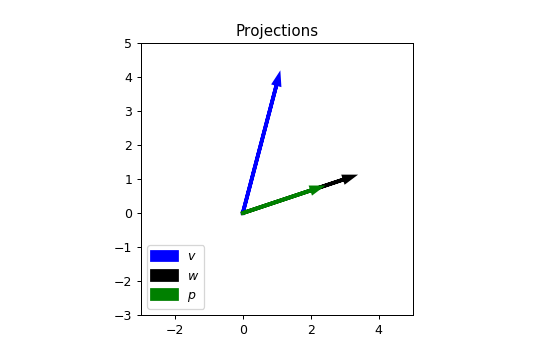

In [5]:
%matplotlib notebook
%matplotlib notebook
plotter = ProjectionPlotter(limits=(-3.0, 5.0), linewidth=3)
plotter.start()

***
*double click here to edit cell*


** Type in your answer to exerise 1.1 here**:

If $\theta_{w-x} = \theta_w - \theta_x$ then
$$  \cos(\theta_{w-x}) = \cos(\theta_w - \theta_x) = \cos(\theta_w) \cdot \cos(\theta_x) + \sin(\theta_w) \cdot \sin(\theta_x) $$

** Type in your answer to exerise 1.2 here**:

The two vectors
$$ \begin{pmatrix} |\bar{x}| \cos(\theta_x) \\ |\bar{x}| \sin(\theta_x) \end{pmatrix} , \begin{pmatrix} \cos(\theta_w) \\ \sin(\theta_w) \end{pmatrix}$$
since
$$ \begin{align}
\begin{pmatrix} |\bar{x}| \cos(\theta_x) \\ |\bar{x}| \sin(\theta_x) \end{pmatrix} \cdot \begin{pmatrix}\cos(\theta_w) \\ \sin(\theta_w) \end{pmatrix} &= |\bar{x}| \cos(\theta_x) \cos(\theta_w) + |\bar{x}| \sin(\theta_x) \sin(\theta_w) \\
&=|\bar{x}| \cdot \left(\cos(\theta_w) \cdot \cos(\theta_x) + \sin(\theta_w) \cdot \sin(\theta_x) \right)\end{align}$$

** Type in your answer to exercise 1.3 here**:
$$\begin{pmatrix} |\bar{x}| \cos(\theta_x) \\ |\bar{x}| \sin(\theta_x) \end{pmatrix} = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} \: \text{and} \: \begin{pmatrix} \cos(\theta_w) \\ \sin(\theta_w) \end{pmatrix} = \begin{pmatrix} w_1 \\ w_2 \end{pmatrix}$$
thus the expression from last exercise reduce to
$$ \bar{w} \cdot \bar{x} = x_1 w_1 + x_2 w_2$$
***

## 2. Activation of a single neuron
The basic building blocks of a neural network, is called an neuron. It takes a number of inputs and sends out a single signal, see Figure below.

<img src="figures/neuron.PNG" width="300" height="300">

The output of a neuron we call its activation $a$. Lets assume that we have two inputs (as in the figure) and that the activation of the neuron is calculated as
$$ a = w_1 x_1 + w_2 x_2 + w_0 $$
you can think of this as a weighted sum of the inputs. The activation of the neuron can have 3 values:

$$ \begin{align}
&a > 0 \Rightarrow \text{Active} \\
&a < 0 \Rightarrow \text{Inactive} \\
&a = 0 \Rightarrow ?
\end{align}
$$

* **Exercise 2.1**: For the case $a=0$ rewrite
$$ a = w_1 x_1 + w_2 x_2 + w_0 $$
into
$$ x_2 = - \frac{w_1}{w_2} x_1 - \frac{w_0}{w_2} $$ in the cell below.


* **Exercise 2.2**: If we define $\alpha = - \frac{w_1}{w_2}$ and $\beta =  - \frac{w_0}{w_2}$ we can simplify the expression from last exercise. Can you recognize what this equation represents. What is $\alpha$, $\beta$?


* **Exercise 2.3**: The original expression for $a$,
$$ a = w_1 x_1 + w_2 x_2 + w_0 $$
can you rewrite that in terms of two vectors $\bar{x}$ and $\bar{w}$ and the inner product between them i.e $a=\bar{w} \cdot \bar{x}$?



***
*double click here to edit cell*

** Type in your answer to exerise 2.1 here**:

For a=0 we have
$$ 0 = w_1 x_1 + w_2 x_2 + w_0 $$
move term with x_2 to the left
$$ - w_2 x_2 = w_1 x_1  + w_0 $$
devide by -w_2
$$ x_2 = \frac{w_1 x_1+ w_0}{-w_2} = -\frac{w_1}{w_2} x_1 - \frac{w_0}{w_2} $$


** Type in your answer to exerise 2.2 here**:

With $\alpha = - \frac{w_1}{w_2}$ and $\beta =  - \frac{w_0}{w_2}$ the above expression is simplify to 
$$ x_2 = \alpha x_1 + \beta$$
this is the expression for a streight line in 2D, where $\alpha$ is the slope and $\beta$ is the intercep with the y-axis.

** Type in your answer to exercise 2.3 here**:

Define $\bar{x}=(x_1, x_2, 1)$ and $\bar{w} = (w_1, w_2, w_0)$. Then the inner product becomes

$$ a = \bar{w} \cdot \bar{x} = w_1 x_1 + w_2 x_2 + w_0 $$

***

* **Exercise 2.4**: Use the widget below to type in some values for $\alpha, \beta$. Can you find a line that (as good as possible) seperated the blue points from the red points. What is the activation of the red, blue points? Hint: is it negative, positive or 0?.

Box(children=(FloatText(value=-2.0, description='\\(\\alpha \\)'), FloatText(value=1.0, description='\\(\\beta…

<IPython.core.display.Javascript object>


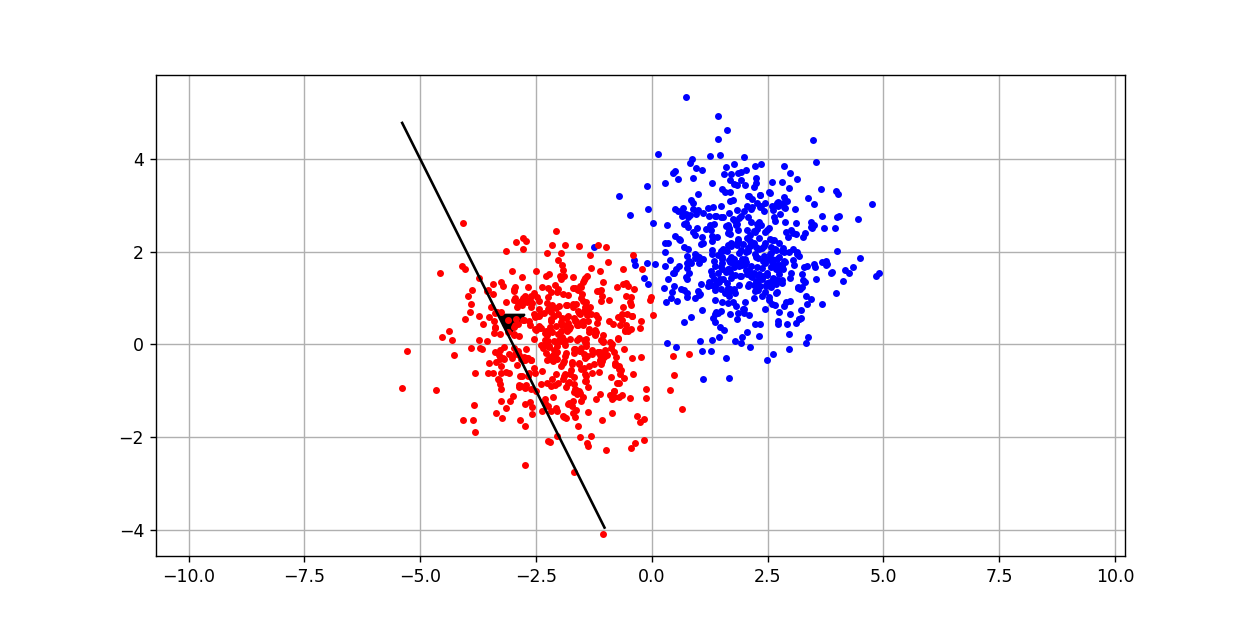

In [4]:
%matplotlib notebook
%matplotlib notebook
widget_0 = widget0()
exercise_2_4(widget_0)

Thus, the take away from this exercise is that neurons is just lines in space that is activated for some points and inactive in some other points. However, as we could see in the example, if we only use a single neuron we can only take very simple decisions. Lets therefore try out a network with more neurons on a complex dataset.

## 3. Projections in a network
We will know use the knowledge we have just gained to analyse how data is propogated through the following simple neural network:

<img src="figures/network.PNG" width="500" height="500">

The network is called a feed forward network, because information is only flowing from left to right. The network has two input neurons, three neurons in the hidden layer and a single output unit. In this simple case, we can interpret the network as taking a 2D point (x,y), propergate its coordinates through the network, and in the end determine if the 2D point should be colored red or blue.

## Data
We will adjust our network such that it can distingues between two classes of 2D points, a inner class of red points and outer ring of blue points.

<IPython.core.display.Javascript object>


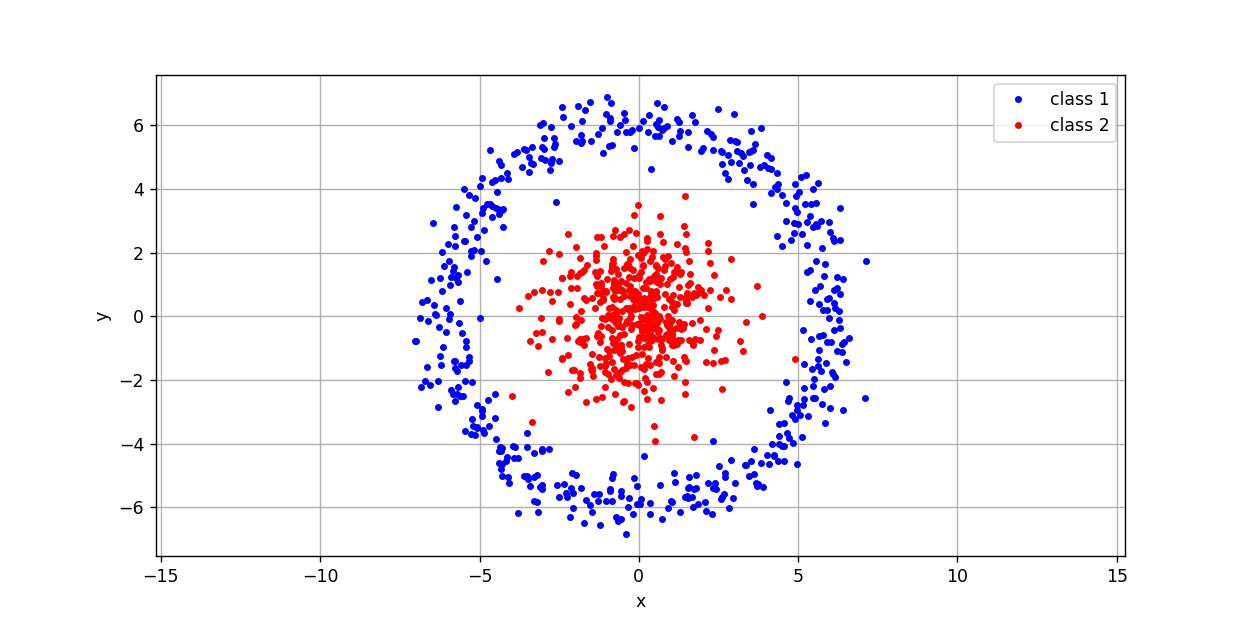

In [5]:
%matplotlib notebook
%matplotlib notebook
# Lets generate 500 points from two classes
X, Y = generate_circle_data(N = 500)
plot_data(X, Y)

* **Exercise 3.1**: Why do we need more than a single neuron to distingues between the two classes in this case?
* **Exercise 3.2**: Our hidden layer has 3 neurons, and each of these network has a number of weights attached to them. Adjust them in the widget below, such that 3 lines generated by the next code block alltogether devide the region of red points from the region of blue points. Hints: (1) what is the connection between the weights and the black 3 arrows in the plot? (2) what is the connection between the lines and the black arrows?

In [ ]:
%matplotlib notebook
%matplotlib notebook
widget_1 = widget1()
plot_decision_lines(X, Y, widget_1)      
plot_decision_contour(X, Y, widget_1)

* **Exercise 3.3**: The three plots above shows the activation of the three neurons in the hidden layer. We can compute the activation of the hidden neuron $h_1$ as:
$$ h_1 = \tanh(w_{11}^{(1)} \cdot x + w_{21}^{(1)} \cdot y + w_{01}^{(1)}) $$
Write down the the activate of the two other hidden units. Hint: look at the figure of network


* **Exercise 3.4** In our network we use $\tanh(a)$ as activation function. This means that after computing the activation of the neuron we send the signal through the $\tanh(a)$ function. Sketch (on paper) $\tanh(\cdot)$ and discuss what happens with the output signal when $a$ is large.


* **Exercise 3.5**:The expression you just wrote down can be simplified using vector notation and inner products. Define a vector $\bar{x}$ and three weight vectors $\bar{w}_1, \bar{w}_2, \bar{w}_3$ and write down the activation for the three hidden neurons using vector notation and inner products.

***
*double click here to edit cell*

** Type in your answer to exerise 3.3 here**:

Neuron 2: $h_2 = \tanh(w_{12}^{(1)} \cdot x + w_{22}^{(1)} \cdot y + w_{02}^{(1)})$

Neuron 3: $h_3 = \tanh(w_{13}^{(1)} \cdot x + w_{23}^{(1)} \cdot y + w_{03}^{(1)})$

** Type in your answer to exerise 3.4 here**

Link to [mathworlds](http://mathworld.wolfram.com/HyperbolicTangent.html) which can plot the function.

For a > 2 or a < -2 we have that $\tanh(a)\approx \pm 1$, meaning that all activations gets restricted to the [-1,1] domain.

** Type in your answer to exerise 3.5 here**

If we define vector $\bar{x} = (x_1, x_2, 1)$ and the following weight vectors 
$$\bar{w}_1 = (w_{11}^{(1)}, w_{21}^{(1)}, w_{01}^{(1)})), \bar{w}_2 = (w_{12}^{(1)}, w_{22}^{(1)}, w_{02}^{(1)})), \bar{w}_3 = (w_{13}^{(1)}, w_{23}^{(1)}, w_{03}^{(1)}))$$
then the activation of the three hidden neurons can be written as:
$$h_1 = \tanh(\bar{w}_1 \cdot \bar{x}), h_2 = \tanh(\bar{w}_2 \cdot \bar{x}), h_2 = \tanh(\bar{w}_3 \cdot \bar{x}) $$

***

* **Exercise 3.6**: Our input layer had two neurons, meaning that we could plot the activation in a 2D space. Since our hidden layer has 3 neurons, we can plot the activation of this layer in a 3D spcae. Adjust the of widget below such that the plane that is plotted, seperates the red and the blue points in the 3D space.

In [ ]:
%matplotlib notebook
%matplotlib notebook
widget_2 = widget2()
classifier = plot3d_space(X, Y, widget_1, widget_2)

In [ ]:
# When you are satisfied with the plot, you can
# run this cell to get the results
classifier.get_res()

* **Exercise 3.6**: Based on the results printed in the bottom of the cell, compute the accuracy and error rate:
$$ \text{accuracy} = \dfrac{\text{number of correctly classified points}}{\text{total number of points}} $$
$$ \text{error rate} = \dfrac{\text{number of wrongly classified points}}{\text{total number of points}} $$
what is the connection between the accuracy and error rate of an classifier?

* **Exercise 3.7**: Go back and try adjusting some of the weights. Can you optimize your classifier i.e. get a better accuracy?

***
*double click here to edit cell*

** Type in your answer to exerise 3.6 here**:
Number of correctly classified points: 475 + 500 = 975

Number of wrongly classified points: 25

Total number of points: 475 + 500 + 25 = 1000

Therefore, $\text{accuracy} = \frac{975}{1000} = 0.975 = 97,5\%$ and $\text{error rate} = \frac{25}{1000} = 0.025 = 2.5\%$.


***

## 4. Tensorflow playground (optional)
The neural network presented in this notebook is very simple, but regardless of network complexity the underlying calculations still relies on the topics presented in this notebook. Try opening [tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.30449&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) where we can play around with number of neurons in our network, activation function ect. Try out the following:

* **Exercise 4.1** Can you recreate the network we have just investigated?

* **Exercise 4.2** What happens with the decision boundary when we change activation function from $tanh(\cdot)$ to $relu(\cdot)$?
* **Exercise 4.3** Try changing the dataset to the spiral. Can you find a network that can classify this data?

Remember to write down your conclusions!